<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/BenjGaskU7Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU7proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU7proj.ipynb"

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!

**Task**:

Two parts:

1. Propose a data set that's compatible with pymc and/or bambi. I must approve your submission before you move on to part 2.

2. Create, analyze, and present any guassian process or approximate GP, degenerate or otherwise (this means glms and b splines are allowed), using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is), or if must be an actual GP
  - You must document and explain your model selection method. This means you must argue that your model choice (glm, b spline, GP) is better than at least one other choice. You may use either a theoretical or numerical argument.



Guidlines:

- Your data or your model type must be different from any project you've previously done.

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- This is not a competition to come up with the fanciest model structure. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- I actually encourge you to use b splines; they work quite well, and trying to determine the location of the knots requires careful thought about the context of the data.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-78alj4_5
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-78alj4_5
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=1eeb9b239e946a34f6bc45e0931e30dcb42b2d389d1d1e504e3c0dd7d2e9d9af
  Stored in directory: /tmp/pip-ephem-wheel-cache-cy6uv_ur/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.5 MB/s eta 0:00:00
   ━

In [112]:
footballREC = pd.read_csv('https://raw.githubusercontent.com/benji555-create/Data-Science/refs/heads/main/NFL%20Recieving%20final%20fix.csv', header=0)
footballREC

,Player,Age,Pos,G,GS,Tgt,Rec,Yds,YperR,TD,FD,Succ%,Lng,R/G,Y/G,Ctch%,Y/Tgt,Fmb
0,Ja'Marr Chase,24,WR,17,16,175,127,1708,13.4,17,75,62.3,70.0,7.5,100.5,72.6,9.8,0
1,Amon-Ra St. Brown,25,WR,17,17,141,115,1263,11.0,12,73,70.2,66.0,6.8,74.3,81.6,9.0,1
2,Brock Bowers,22,TE,17,16,153,112,1194,10.7,5,61,60.8,57.0,6.6,70.2,73.2,7.8,0
3,Trey McBride,25,TE,16,16,147,111,1146,10.3,2,63,63.3,37.0,6.9,71.6,75.5,7.8,0
4,Malik Nabers,21,WR,15,13,170,109,1204,11.0,7,55,51.2,59.0,7.3,80.3,64.1,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Jameis Winston,30,QB,12,7,0,0,0,NaN,0,0,NaN,NaN,0.0,0.0,NaN,NaN,5
592,Tristan Wirfs,25,T,16,16,0,0,9,NaN,0,0,NaN,9.0,0.0,0.6,NaN,NaN,1
593,Bryce Young,23,QB,14,12,0,0,0,NaN,0,0,NaN,NaN,0.0,0.0,NaN,NaN,5
594,Dareke Young,25,WR,14,0,1,0,0,NaN,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0


In [113]:
footballREC = footballREC.query('Rec>10')
footballREC = footballREC.query('G>5')
footballREC

,Player,Age,Pos,G,GS,Tgt,Rec,Yds,YperR,TD,FD,Succ%,Lng,R/G,Y/G,Ctch%,Y/Tgt,Fmb
0,Ja'Marr Chase,24,WR,17,16,175,127,1708,13.4,17,75,62.3,70.0,7.5,100.5,72.6,9.8,0
1,Amon-Ra St. Brown,25,WR,17,17,141,115,1263,11.0,12,73,70.2,66.0,6.8,74.3,81.6,9.0,1
2,Brock Bowers,22,TE,17,16,153,112,1194,10.7,5,61,60.8,57.0,6.6,70.2,73.2,7.8,0
3,Trey McBride,25,TE,16,16,147,111,1146,10.3,2,63,63.3,37.0,6.9,71.6,75.5,7.8,0
4,Malik Nabers,21,WR,15,13,170,109,1204,11.0,7,55,51.2,59.0,7.3,80.3,64.1,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Alec Ingold,28,FB,15,10,12,11,96,8.7,0,3,66.7,25.0,0.7,6.4,91.7,8.0,2
271,Jordan Mason,25,RB,12,6,14,11,91,8.3,0,5,64.3,24.0,0.9,7.6,78.6,6.5,3
272,Eric Saubert,30,TE,17,3,14,11,97,8.8,1,5,57.1,17.0,0.6,5.7,78.6,6.9,1
273,Tylan Wallace,25,WR,17,0,12,11,193,17.5,1,5,66.7,84.0,0.6,11.4,91.7,16.1,1


In [114]:
catchRate = (footballREC.Rec/footballREC.Tgt) * 100
footballREC.insert(loc=4, column="RecRate", value=catchRate)
footballREC = footballREC[['Player', 'Tgt', 'FD', 'RecRate', 'Pos']]
footballREC

,Player,Tgt,FD,RecRate,Pos
0,Ja'Marr Chase,175,75,72.571429,WR
1,Amon-Ra St. Brown,141,73,81.560284,WR
2,Brock Bowers,153,61,73.202614,TE
3,Trey McBride,147,63,75.510204,TE
4,Malik Nabers,170,55,64.117647,WR
...,...,...,...,...,...
270,Alec Ingold,12,3,91.666667,FB
271,Jordan Mason,14,5,78.571429,RB
272,Eric Saubert,14,5,78.571429,TE
273,Tylan Wallace,12,5,91.666667,WR


In [115]:
footballREC = footballREC.query('RecRate<100')
footballREC

,Player,Tgt,FD,RecRate,Pos
0,Ja'Marr Chase,175,75,72.571429,WR
1,Amon-Ra St. Brown,141,73,81.560284,WR
2,Brock Bowers,153,61,73.202614,TE
3,Trey McBride,147,63,75.510204,TE
4,Malik Nabers,170,55,64.117647,WR
...,...,...,...,...,...
270,Alec Ingold,12,3,91.666667,FB
271,Jordan Mason,14,5,78.571429,RB
272,Eric Saubert,14,5,78.571429,TE
273,Tylan Wallace,12,5,91.666667,WR


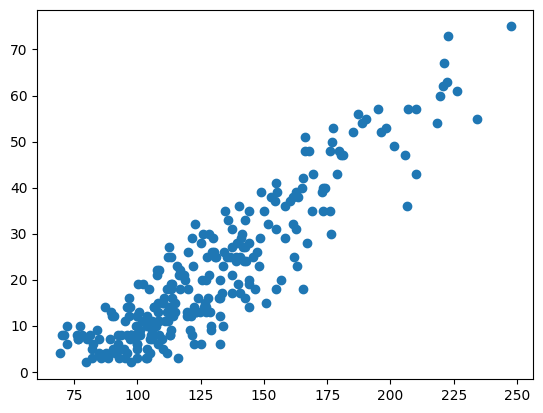

In [116]:
plt.scatter(x=(footballREC.Tgt+footballREC.RecRate), y=footballREC.FD)

The scatterplot shows a very solid linear relationship between first downs and targets+catch rate. The more targets you have(QB likes throwing to you), the more you are looked to step up on key short distance third downs or to make big chunk plays for your team. Both of these expectations result in first downs, so it makes sense that more targets would cause more first downs. Catch rate is a data point that shows reliability, similarily showing the trust between a QB and reciever numerically. This trust is what causes QBs to look someones way to throw to them for first downs.

array([[<Axes: xlabel='Tgt', ylabel='Tgt'>,
        <Axes: xlabel='FD', ylabel='Tgt'>,
        <Axes: xlabel='RecRate', ylabel='Tgt'>],
       [<Axes: xlabel='Tgt', ylabel='FD'>,
        <Axes: xlabel='FD', ylabel='FD'>,
        <Axes: xlabel='RecRate', ylabel='FD'>],
       [<Axes: xlabel='Tgt', ylabel='RecRate'>,
        <Axes: xlabel='FD', ylabel='RecRate'>,
        <Axes: xlabel='RecRate', ylabel='RecRate'>]], dtype=object)

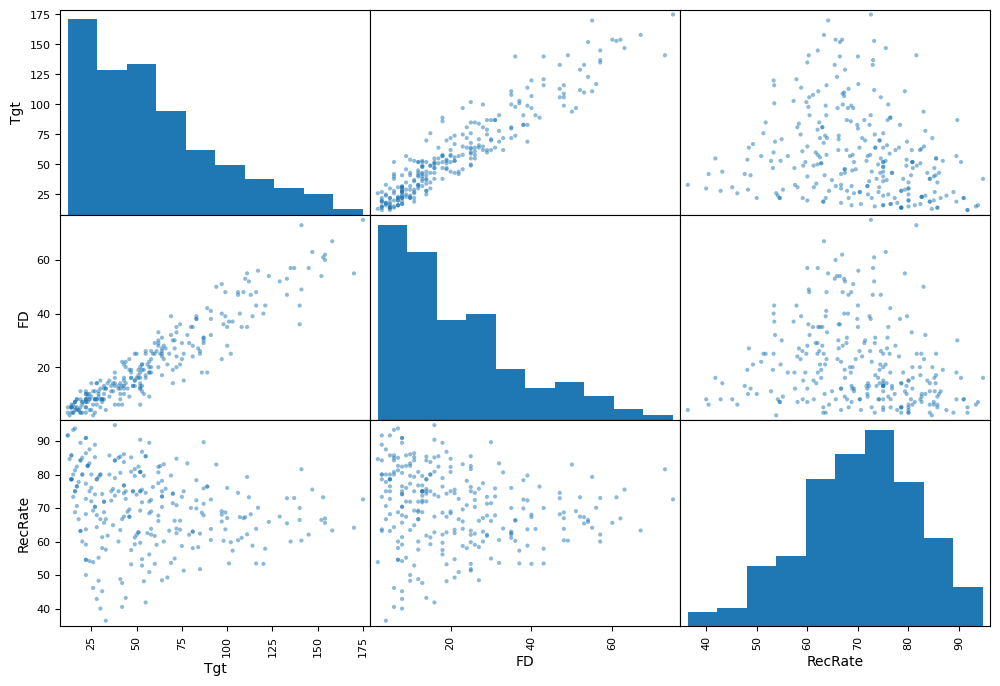

In [117]:
pd.plotting.scatter_matrix(footballREC, figsize=(12, 8))

In [118]:
print(footballREC.columns)

Index(['Player', 'Tgt', 'FD', 'RecRate', 'Pos'], dtype='object')


In [144]:
model_1 = bmb.Model("FD ~ Tgt", footballREC)
idata_1 = model_1.fit()

Output()

In [145]:
model_4 = bmb.Model("FD ~ poly(Tgt, degree=4)", footballREC)
idata_4 = model_4.fit()

Output()

In [147]:
model_7 = bmb.Model("FD ~ poly(`Tgt`, degree=7)", footballREC)
idata_7 = model_7.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


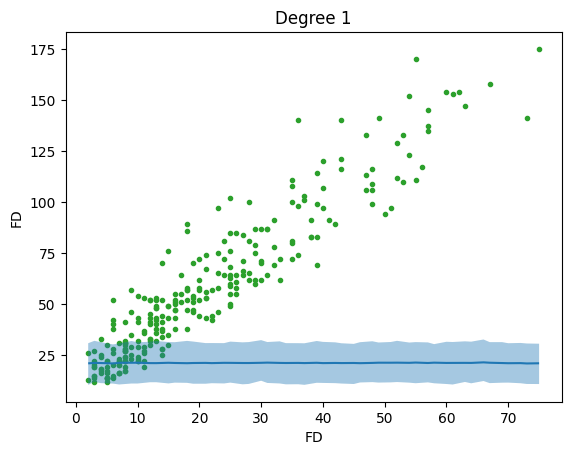

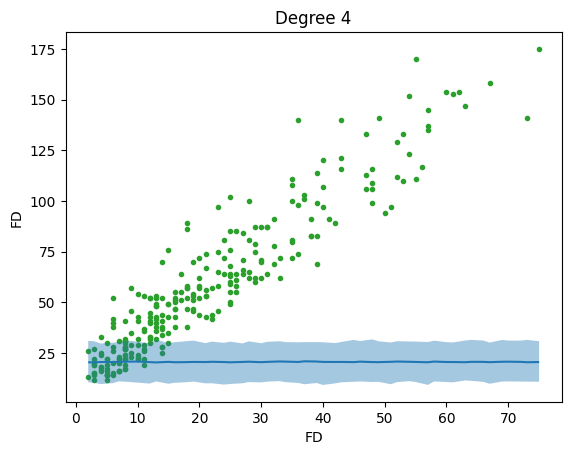

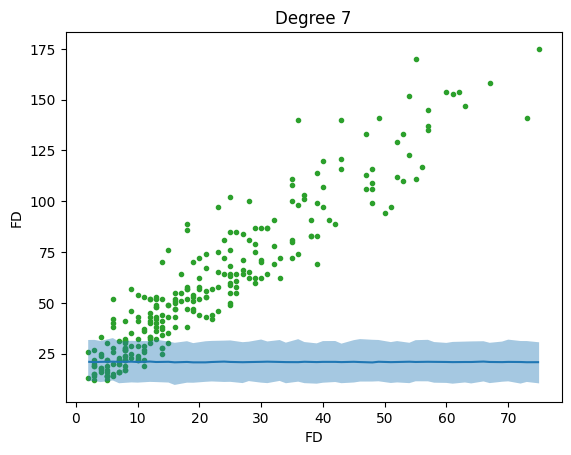

In [149]:
bmb.interpret.plot_predictions(model_1, idata_1, "FD", pps=True)
plt.plot(footballREC['FD'], footballREC['Tgt'], "C2.", zorder=-3)
plt.title("Degree 1")

bmb.interpret.plot_predictions(model_4, idata_4, "FD", pps=True)
plt.plot(footballREC['FD'], footballREC['Tgt'], "C2.", zorder=-3)
plt.title("Degree 4")

bmb.interpret.plot_predictions(model_7, idata_7, "FD", pps=True)
plt.plot(footballREC['FD'], footballREC['Tgt'], "C2.", zorder=-3)
plt.title("Degree 7")

plt.show()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

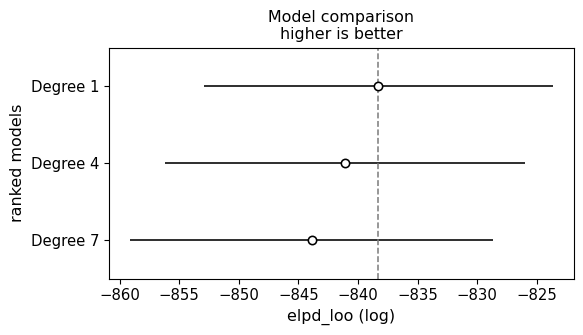

In [154]:
compare = az.compare({"Degree 1": idata_1,"Degree 4": idata_4,"Degree 7": idata_7},)
az.plot_compare(compare)

The polynomial models did not work at all. I was just trying it, and it is really innaccurate. The prediction doesn't fit the plot at all, for any of these degrees. I used 4 and 7 as Rakesh advised me to try and do that. But this didn't work at all, so I am going to try bSpline.

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='RecRate', ylabel='FD'>], dtype=object))

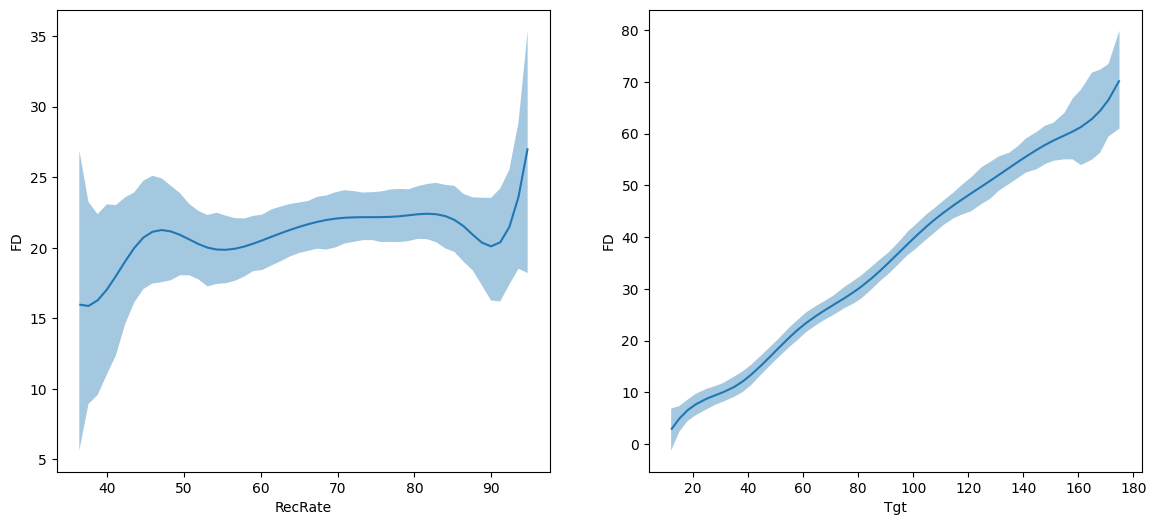

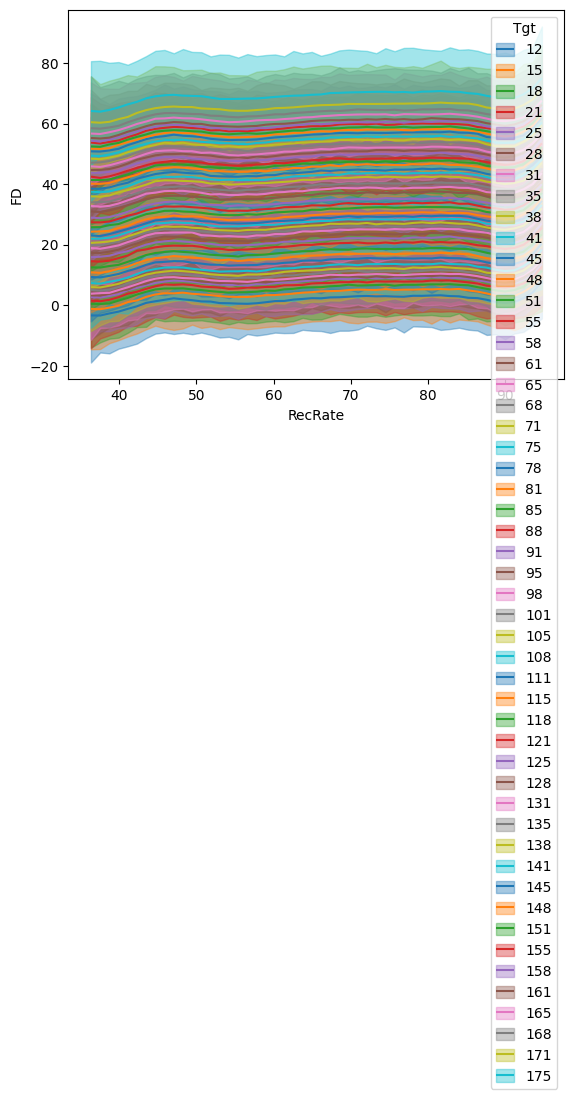

In [157]:
num_knots = 6
knots_Catch = np.linspace(footballREC['RecRate'].min(), footballREC['RecRate'].max(), num_knots + 2)[1:-1]
knots_Targets = np.linspace(footballREC['Tgt'].min(), footballREC['Tgt'].max(), num_knots + 2)[1:-1]
model_spline = bmb.Model("FD ~ bs(RecRate, degree=3, knots=knots_Catch) + bs(Tgt, degree=3, knots=knots_Targets)", data=footballREC, family="gaussian")
idata_spline = model_spline.fit(idata_kwargs={'log_likelihood': True})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#That makes the subplots of the individual effect from RecRate and Tgt

bmb.interpret.plot_predictions(model_spline, idata_spline, ['RecRate'], ax=axes[0])


bmb.interpret.plot_predictions(model_spline, idata_spline, ['Tgt'], ax=axes[1])


bmb.interpret.plot_predictions(model_spline, idata_spline, ["RecRate", "Tgt"], pps=True)





I've been messing with this for a while, and I got a lot lower bound and upper bound errors, so I just worked to try and get them right, adding in the .min() and .max() to every bound.

This model is showing the effect of Catch% and Targets on First Downs, with Targets having a linear relationship while Catch% seems to have a pretty sporadic relationship with First Downs. I still believe that catch% has a relationship with First Downs, but I think the inclusion of people with minimal recpetions causes their catch percentage to be high, and not a great representation of bad vs good recievers. This cuases the graph of both varriable vs First downs to be kind of wack, with showing a slight increase in first downs when increasing catch% and targets.

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

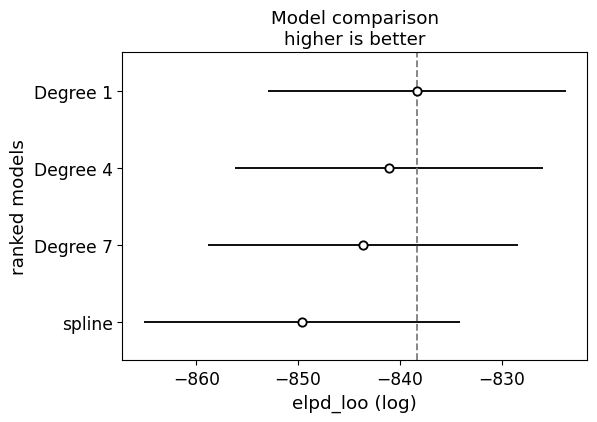

In [152]:
compare = az.compare({"spline":idata_spline,  "Degree 1": idata_1, "Degree 4": idata_4,"Degree 7": idata_7 },)
az.plot_compare(compare)

Even though the elpd_loo shows that the bspline model is worse, I think that its wrong. bSpline models tend to be more smooth and easier to read, which is certainly true for mine. My polynomail models are just very inaccurate, and while I feel like my bSpline model isn't perfect, I think it's pretty good.